In [1]:
import sys
import os
import collections
from collections import defaultdict
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import re

In [2]:
cs_file = "Final.csv"
data = pd.read_csv(cs_file)
data.shape

c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (5,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(485250, 20)

In [3]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [4]:
data.columns = ['univName', 'major', 'program', 'season', 'decision', 'Method', 'decdate', 'decdate_ts', 'cgpa', 'greV', 'greQ', 
           'greA', 'is_new_gre', 'gre_subject','status', 'post_data', 'post_timestamp', 'comments']
data.head()

,univName,major,program,season,decision,Method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,status,post_data,post_timestamp,comments
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [5]:
data = data[data['decision'] =='Accepted']

data.shape

(197058, 18)

In [6]:
data = data[pd.notnull(data['greQ'])]
data.shape

(61474, 18)

In [7]:
data['greQ'] = data['greQ'].fillna(130)
data['greV'] = data['greV'].fillna(130)
data['greA'] = data['greA'].fillna(0)
data.greA.head()

7     4.0
14    3.0
17    5.5
28    4.0
46    4.0
Name: greA, dtype: float64

In [8]:
uni_names = data['univName'].unique()

similar_univs = pd.DataFrame({'univName':uni_names})
similar_univs

,univName
0,New York University (NYU) - Steinhardt
1,Ohio State University
2,Texas A&M University
3,St. Johns University
4,"University Of California, Irvine"
...,...
5316,Columbia University GSAS
5317,New York University(NYU)
5318,DeVry University
5319,Oregon University


In [9]:
data.describe()

,decdate_ts,cgpa,greV,greQ,greA,gre_subject,post_timestamp
count,6.145400e+04,55589.000000,61474.000000,61474.000000,61474.000000,7175.000000,6.147400e+04
mean,1.431551e+09,3.715970,231.556333,248.826447,4.144757,796.411150,1.431763e+09
std,9.540728e+07,0.506153,174.575147,208.551820,1.111126,122.305977,8.079993e+07
min,-1.000000e+00,0.400000,130.000000,130.000000,0.000000,310.000000,1.263283e+09
25%,1.363244e+09,3.520000,155.000000,157.000000,3.500000,710.000000,1.363417e+09
50%,1.426662e+09,3.750000,161.000000,164.000000,4.000000,800.000000,1.427094e+09
75%,1.490771e+09,3.900000,167.000000,170.000000,5.000000,890.000000,1.491030e+09
max,1.360120e+10,9.990000,800.000000,800.000000,6.000000,990.000000,1.562569e+09


In [10]:
def convert_quant_score(quant_score):
    quant_list = []
    quant_score = quant_score.tolist()
    for old_quant in quant_score:
        if old_quant <= 170:
            quant_list.append(old_quant)
            continue
        else:
            old_quant = old_quant/4.7
            if old_quant <=130:
                quant_list.append(130)
            else:
                quant_list.append(old_quant)
    return quant_list

def convert_verbal_score(verbal_score):
    verbal_list = []
    verbal_score = verbal_score.tolist()
    for old_verbal in verbal_score:
        if old_verbal <= 170:
            verbal_list.append(old_verbal)
            continue
        else:
            old_verbal = old_verbal/4.7
            if old_verbal <=130:
                verbal_list.append(130)
            else:
                verbal_list.append(old_verbal)
    return verbal_list

data['greQ'] = convert_quant_score(data['greQ'])
data['greV'] = convert_verbal_score(data['greV'])


c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

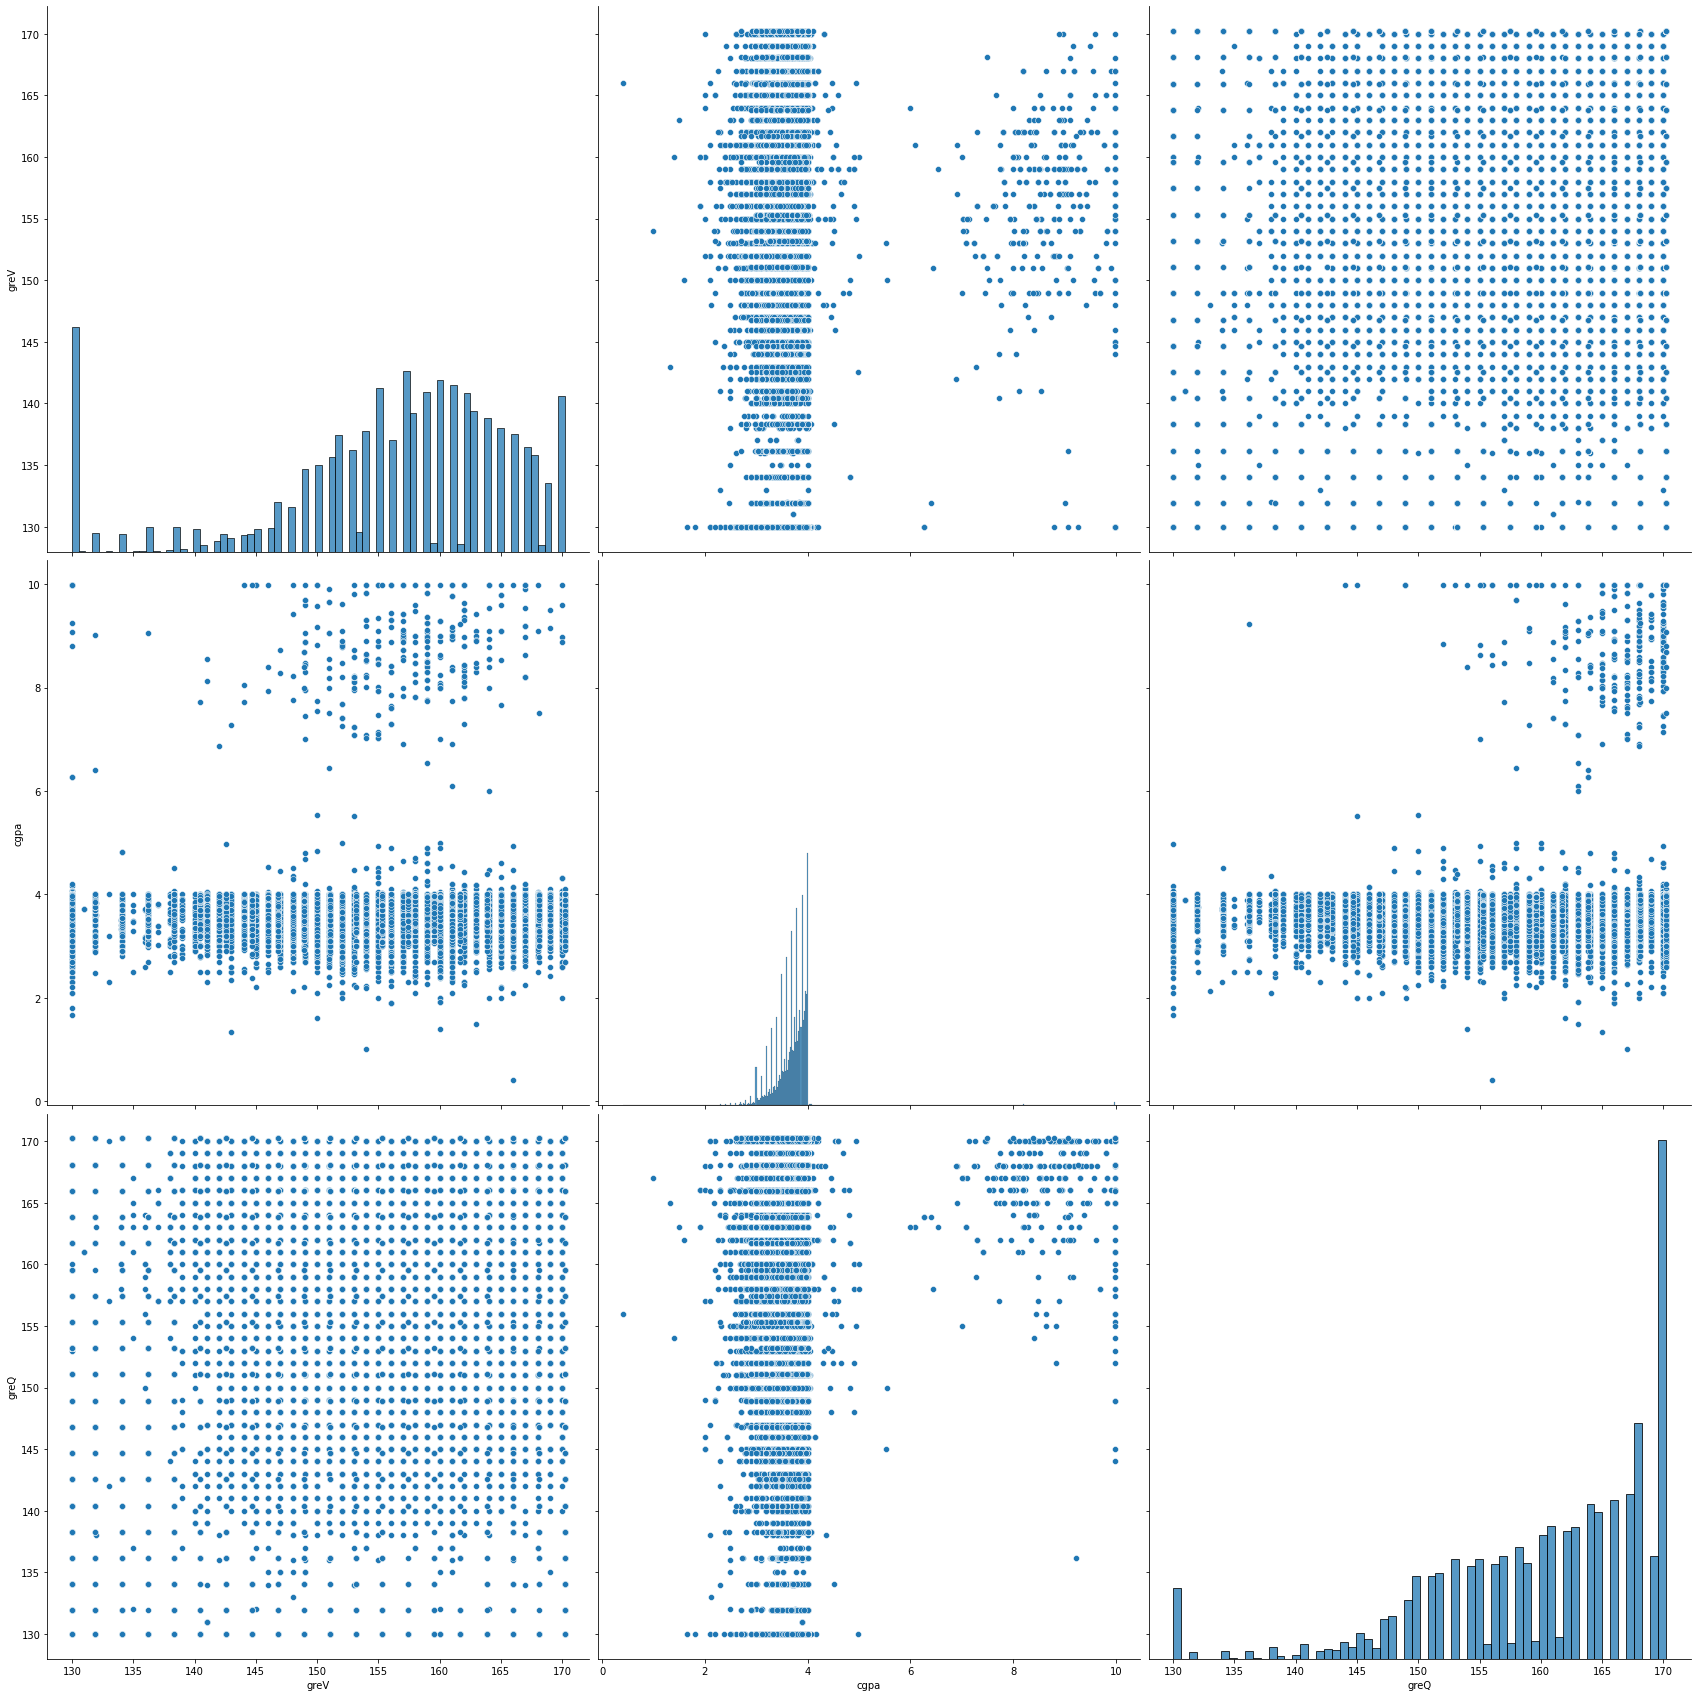

In [11]:
sns.pairplot(data, palette="husl", x_vars=["greV","cgpa","greQ"], y_vars=["greV","cgpa","greQ"], height=8)
plt.show()


In [12]:
def normalize_gpa(data2,cgpa,totalcgpa):
    cgpa = data2[cgpa].tolist()
    totalcgpa = data2[totalcgpa].tolist()
    for i in range(len(cgpa)):
        if totalcgpa[i] != 0:
            cgpa[i] = cgpa[i] / totalcgpa[i]
        else:
            cgpa[i] = 0
    data2['cgpa'] = cgpa
    return data2



In [13]:
data = data.drop('major',1)
data = data.drop('program',1)
data = data.drop('season',1)
data = data.drop('decision',1)
data = data.drop('Method',1)
data = data.drop('decdate',1)
data = data.drop('decdate_ts',1)
data = data.drop('is_new_gre',1)
data = data.drop('gre_subject',1)
data = data.drop('status',1)
data = data.drop('post_data',1)
data = data.drop('post_timestamp',1)
data = data.drop('comments',1)

university_list = list(set(data['univName'].tolist()))
for i in range(len(university_list)):
	if(len(data[data['univName'] == university_list[i]]) < 100):
		data = data[data['univName'] != university_list[i]]
data = data.dropna()

data.head()

C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\4000121458.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('major',1)
C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\4000121458.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('program',1)
C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\4000121458.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('season',1)
C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\4000121458.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('decision',1)
C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\4000121458.py:5: FutureWarning: In a 

,univName,cgpa,greV,greQ,greA
14,Ohio State University,4.00,150.0,166.0,3.0
17,Texas A&M University,3.57,157.0,151.0,5.5
46,"University Of California, Irvine",3.66,155.0,167.0,4.0
64,Boston University,3.10,161.0,157.0,4.0
203,Oregon State University,3.38,154.0,170.0,4.0


In [14]:
processed_data = data[['greV', 'greQ', 'greA', 'cgpa', 'univName']]
processed_data.head()

processed_data.to_csv('Processed_data.csv')

In [15]:
import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support





In [16]:
#similar_univs = pandas.read_csv('similar_universities.csv')
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
print(test_cutoff)
test = processed_data.loc[random_indices[1:test_cutoff]]
train = processed_data.loc[random_indices[test_cutoff:]]
train_output_data = train['univName']
print("train Output data", train_output_data)
train_input_data = train
train_input_data = train_input_data.drop('univName',1)
print("train input data", train_input_data)
test_output_data = test['univName']
print("test Output data", test_output_data)
test_input_data = test
test_input_data = test_input_data.drop('univName',1)
print("test input data", test_input_data)

5161
train Output data 14707      University Of Californa, Los Angeles (UCLA)
335418                      University Of Pennsylvania
362306                              Harvard University
259907                          University Of Virginia
308344                           Penn State University
                              ...                     
426291    University Of California, Los Angeles (UCLA)
264992                              University Of Iowa
61611                            Iowa State University
278636                                 Yale University
241884                 North Carolina State University
Name: univName, Length: 20647, dtype: object
train input data               greV        greQ  greA  cgpa
14707   160.000000  165.000000   5.0  3.58
335418  165.000000  164.000000   4.5  4.00
362306  170.212766  159.574468   5.5  3.71
259907  160.000000  167.000000   5.0  3.64
308344  155.000000  154.000000   4.5  3.84
...            ...         ...   ...   ...
426291  1

C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\929880055.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_input_data = train_input_data.drop('univName',1)
C:\Users\juhis\AppData\Local\Temp\ipykernel_5840\929880055.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_input_data = test_input_data.drop('univName',1)


In [17]:

def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
    print(k)
    distances = {}
    sort = {}
    length = testInstance.shape[1]

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        
        distances[x] = dist[0]

    sorted_d = sorted(distances.items(), key=lambda x: x[1])

 
    neighbors = []

    for x in range(k):
        neighbors.append(sorted_d[x][0])

    classVotes = {}

    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
 
    return(sortedVotes, neighbors)


In [18]:

testSet = [[142, 153, 5.0, 3.6]]
test = pd.DataFrame(testSet)
test.shape

(1, 4)

In [19]:

k = 7

result,neigh= knn(processed_data, test, k)


list1 = []
list2 = []
for i in result:
    list1.append(i[0])
    list2.append(i[1])
for i in list1:
    print(i)
    


7
University Of Colorado, Boulder
University Of Florida
University Of Arizona
University Of Pennsylvania (UPenn)
Syracuse University
University Of Texas At Austin
Emory University


In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(processed_data.iloc[:,0:4], data['univName'])

print(neigh.predict(test))

['Syracuse University']


c:\Users\juhis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
